In [83]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_dta = pd.read_csv(mouse_drug_data_to_load)
clinical_dta = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_dta, clinical_dta, on='Mouse ID')

# Retain the drugs necessary for this analysis
merge_df = merge_df[(merge_df["Drug"] == 'Capomulin') |
                      (merge_df["Drug"] == 'Infubinol') |
                      (merge_df["Drug"] == 'Ketapril') |
                      (merge_df["Drug"] == 'Placebo')
                   ]

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [84]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Here an entirely new DataFrame is made but converting with .reset_index() restores the DataFrame formatting
# HOWEVER, making a new DataFrame is the best way to unstack later
dtp_mean = pd.DataFrame(merge_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])

# Preview DataFrame
dtp_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [85]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
dtp_sem = pd.DataFrame(merge_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])

# Preview DataFrame
dtp_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [86]:
# Pivoted table with mean values
# Pivot the table with .unstack(level=0) and .columns.get_level_values(1)
dtp_mean = dtp_mean.unstack(0)
dtp_mean.columns = dtp_mean.columns.get_level_values(1)

# Preview that Reformatting worked
dtp_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [87]:
# Pivoted table with standard error mean values
dtp_sem = dtp_sem.unstack(0)
dtp_sem.columns = dtp_sem.columns.get_level_values(1)

# Preview that Reformatting worked
dtp_sem

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


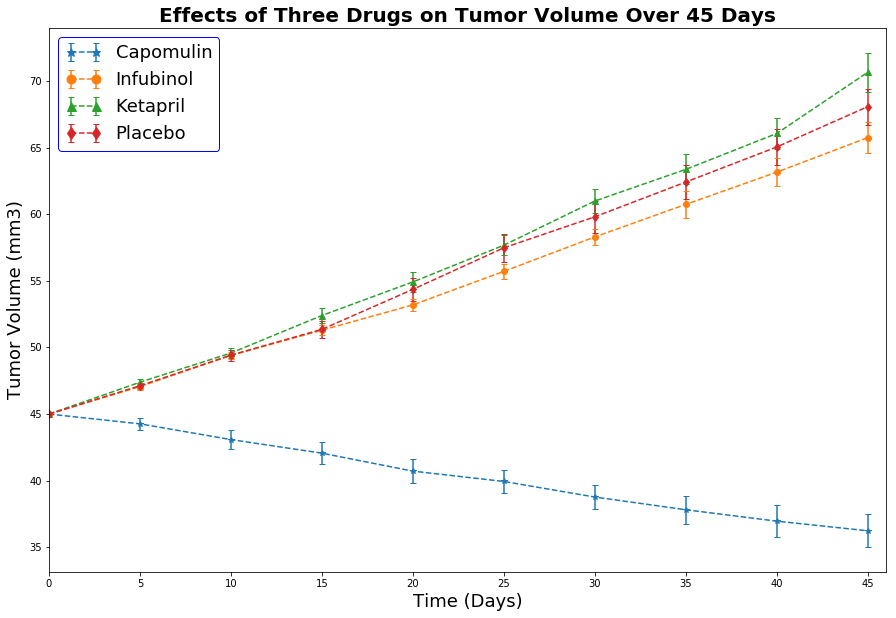

In [88]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(15,10))
plt.title('Effects of Three Drugs on Tumor Volume Over 45 Days',
          fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Time (Days)', fontdict = {'fontsize': 18})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 18})
# Ticks are value points shown on the graph below.
plt.xticks(np.arange(0, dtp_mean.index.max()+3, 5))
plt.xlim(0, dtp_mean.index.max()+1)

# Creating the independent variable with timepoints
xval = dtp_mean.index

# markers for tick points.  Letters sometimes refer to shapes e.g. 's'=square and 'd'=diamond/rhombus
markers = ['*', 'o', '^', 'd']

# Counter for ticks in plot loop.  THIS IS NECESSARY FOR THE PLOT TO ACTUALLY SHOW
count = 0

# Plot the graph's error bars with a for loop
for m in dtp_mean.columns:
    plt.errorbar(xval,
                 dtp_mean[m],
                 dtp_sem[m],
                 linestyle = '--',
                 marker=markers[count],
                 capthick=1,              # error bar cap
                 capsize=3               # error bar cap
                )
    count += 1

# Create a colorcoded legend for all of the lines in the graph
leg = plt.legend(numpoints=2,       # Generates two markers in the legend
                 markerscale=1.5,   # Scales the marker size
                 edgecolor='b',     # Legend box edge color
                 fontsize='18',
                 framealpha=1)      # alpha refers to frame opacity

# Save the Figure
plt.savefig('Drug_Effect_on_Tumor.png')


## Metastatic Response to Treatment

In [89]:
# Store the Average Mean associated with Met. Sites Grouped by Drug and Timepoint in a new DataFrame
mean_meta = pd.DataFrame(merge_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])

# Pivot the 'Drugs' Group into the column header
mean_meta = mean_meta.unstack(0)
mean_meta.columns = mean_meta.columns.get_level_values(1)

# Preview DataFrame
mean_meta.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [90]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint in a new DataFrame
sem_meta = pd.DataFrame(merge_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])

# Pivot the 'Drugs' Group into the column Header
sem_meta = sem_meta.unstack(0)
sem_meta.columns = sem_meta.columns.get_level_values(1)

# Preview DataFrame
sem_meta.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


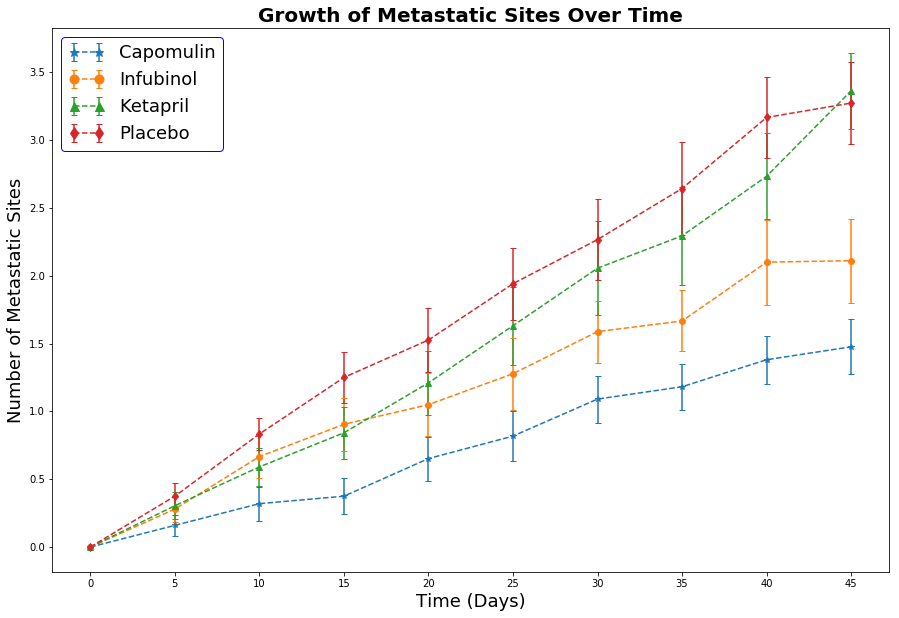

In [91]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(15,10))
plt.title('Growth of Metastatic Sites Over Time',
          fontdict={'fontsize':20, 'fontweight': 'bold'})
plt.xlabel('Time (Days)', fontdict={'fontsize':18})
plt.ylabel('Number of Metastatic Sites', fontdict={'fontsize':18})
plt.xticks(np.arange(0, mean_meta.index.max()+3, 5))

# Creating the independent variable with timepoints
xval = mean_meta.index

# markers for tick points.  Letters sometimes refer to shapes e.g. 's'=square and 'd'=diamond/rhombus
markers = ['*', 'o', '^', 'd']

# Counter for ticks in plot loop
count = 0

# Plot the graph's error bars with a for loop
for m in mean_meta:
    plt.errorbar(xval,
                 mean_meta[m],
                 sem_meta[m],
                 linestyle='--',
                 marker = markers[count],
                 capthick=1,
                 capsize=3)
    count += 1

# Create and format the legend
leg = plt.legend(numpoints=2,
                 frameon=True,
                 markerscale=1.5,
                 edgecolor='b',
                 fontsize='18',
                 framealpha=1)

# Save the Figure
plt.savefig('Metastasis_over_Time.png')

## Survival Rates

In [92]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_cnt = merge_df.groupby(['Drug','Timepoint']).count()['Mouse ID'].rename(columns={'Mouse ID':'Mouse Count'})

# Convert to DataFrame with drug column headers using .unstack()
mouse_cnt = mouse_cnt.unstack(0)

# Preview DataFrame
mouse_cnt.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


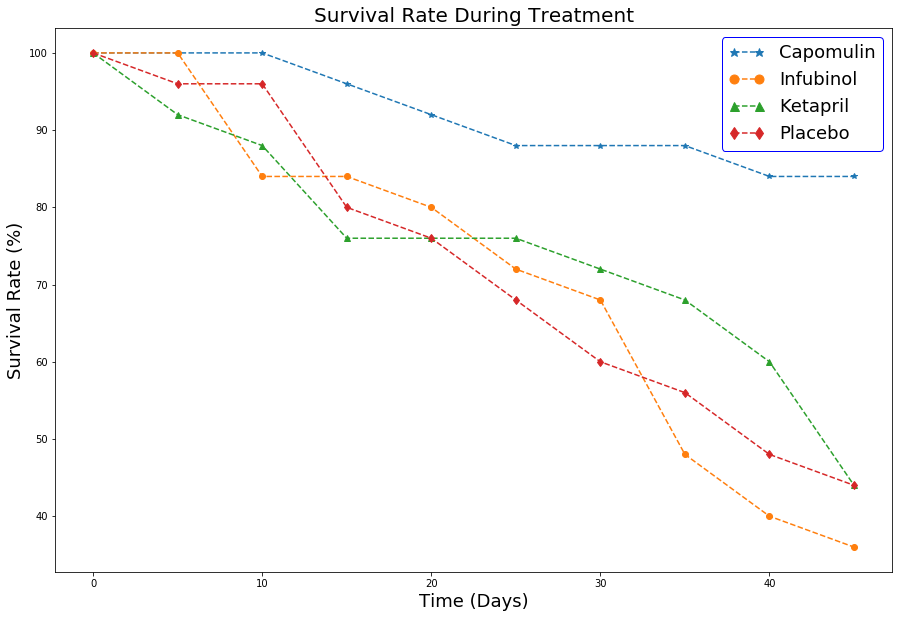

In [93]:
# Generate the Plot (Accounting for percentages).  No Standard Error of Mean this time.
plt.figure(figsize=(15,10))
plt.title('Survival Rate During Treatment', fontdict={'fontsize':20})
plt.xlabel('Time (Days)', fontdict={'fontsize':18})
plt.ylabel('Survival Rate (%)', fontdict={'fontsize':18})

# Creating the independent variable with timepoints
xval = mouse_cnt.index

# markers for tick points.  Letters sometimes refer to shapes e.g. 's'=square and 'd'=diamond/rhombus
markers = ['*', 'o', '^', 'd']

# Counter for ticks in plot loop
count = 0

# For Loop to graph the plot (no error bars necessary)
for m in mouse_cnt:
    yval = mouse_cnt[m] / mouse_cnt.loc[0,m] * 100      # Survival Percentage Calculation for each loop/tick
    plt.plot(xval,
             yval,
             linestyle='--',
             marker=markers[count])
    count += 1

# Create and format the legend
leg = plt.legend(numpoints=2,
                 frameon=True,
                 markerscale=1.5,
                 edgecolor='b',
                 fontsize='18',
                 framealpha=1)

# Save the Figure
plt.savefig('Survival_Rate_During_Treatment.png')

In [94]:
# Refresher on Average Change in Tumor Volume based on Drug Treatment and Timepoint
dtp_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


## Summary Bar Graph

In [98]:
# Calculate the percent changes for each drug
tumor_chg = (dtp_mean.iloc[9,:] - dtp_mean.iloc[0,:]) / dtp_mean.iloc[0,:] * 100

# Display the data to confirm
tumor_chg

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

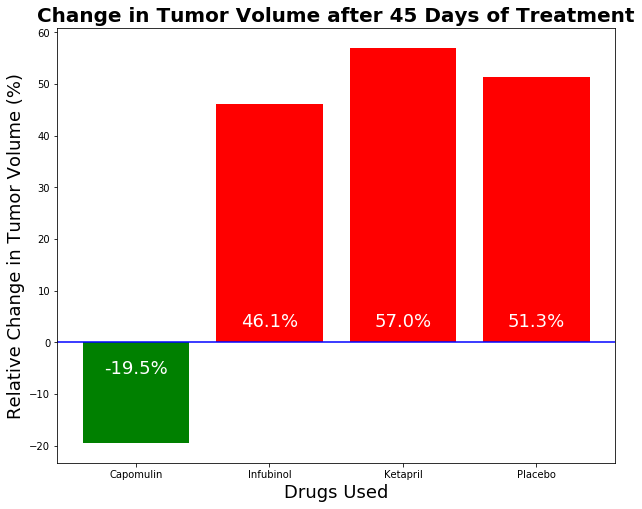

In [126]:
# Store all Relevant Percent Changes into a Tuple
# Use .subplots(figsize=(width,height)) at the beginning to configurate the chart dimensions
plt.subplots(figsize=(10,8))
plt.title('Change in Tumor Volume after 45 Days of Treatment', fontdict={'fontsize':20, 'fontweight':'bold'})
plt.xlabel('Drugs Used', fontdict={'fontsize':18})
plt.ylabel('Relative Change in Tumor Volume (%)', fontdict={'fontsize':18})
plt.axhline(y=0, color='b')
xlbl = tumor_chg.index
plt.xticks(np.arange(len(xlbl)), xlbl)        # Labels the bars in the chart

# Graphs Percentage Change as  Bar Chart
plt.bar(np.arange(4),
        tumor_chg,
        # Uses list comprehension (if statement first) to determine bar color
        color=['r' if tumor_chg[m]>0 else 'g' for m in np.arange(len(xlbl))])

# Counter for x Coordinate Location of Label
count = 0

# For Loop to Place Percentages in Appropriate Positions
for m in tumor_chg:
    if m < 0:
        ycoord = -6.0
    elif m >= 0:
        ycoord = 3
    plt.text(count, ycoord, f'{round(m,1)}%', ha='center', color='w', fontdict={'fontsize':18})
    count += 1


# Save the Figure
plt.savefig('Tumor_Change_Bar_Chart.png')

